In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Part I: Analyzing US baby name trends

The SSA has made available data on the frequency of baby names from 1880 through 2021 (at the time of this writing).
The raw data can be obtained from [the SSA webpage](https://www.ssa.gov/oact/babynames/limits.html) (there is one file per year).

**Part 0:** Download the [National Data](https://www.ssa.gov/oact/babynames/names.zip) file *names.zip* and unzip it.

**Part 1** Assemble all of the data into a single DataFrame and add a *year* field. 
You can do this using [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [2]:
years = list(range(1880,2021))

In [3]:
df_list = []
for year in years:
    # load the dataset into a dataframe
    df = pd.read_csv('../../../Data/names/yob'+str(year)+'.txt',header=None,names=['name','sex','births'])
    # add year column
    df['year'] = year
    # put dataframe in df_list
    df_list.append(df)
names = pd.concat(df_list)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


**Part 2:** Plot the total births by sex and year

<AxesSubplot:xlabel='year'>

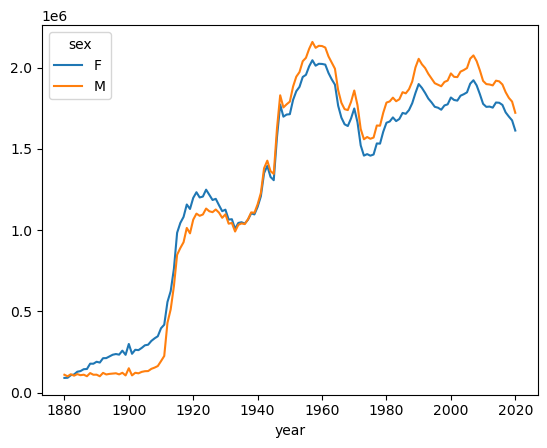

In [4]:
names.groupby(['sex', 'year']).births.sum().unstack(level=0).plot()

**Part 3:** Plot the number of babies given a particular name (your own, or another name) by year.

Text(0.5, 0, 'Year')

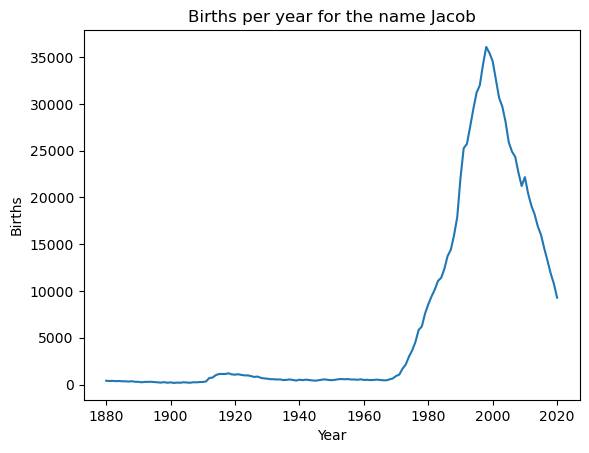

In [5]:
names[names['name'] == 'Jacob'].groupby('year').births.sum().plot()
plt.title('Births per year for the name Jacob')
plt.ylabel('Births')
plt.xlabel('Year')

**Part 4:** Insert a column 'prop' with the relative frequency of each name in each of the years.

In [6]:
names['prop'] = names['births']/names.groupby(['year'])['births'].transform('sum')
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666


In [7]:
names1880 = names[names['year'] == 1880]
names1880.births.sum()

201484

**Part 5**: Create a DataFrame 'top1000_names' that contains the top 1000 names for each sex/year combination.
You will use this top 1000 dataset in the following investigations into the data.

In [8]:
top1000_names = names.groupby(['year','sex','name', 'prop']).births.sum().reset_index()

# keep only the top 1000 names per year by births
def get_top1000(group):
    return group.sort_values(by=['births'], ascending=False).head(1000)

top1000_names = top1000_names.groupby('year').apply(get_top1000).reset_index(drop=True)

top1000_names.head()

,year,sex,name,prop,births
0,1880,M,John,0.047919,9655
1,1880,M,William,0.047309,9532
2,1880,F,Mary,0.035065,7065
3,1880,M,James,0.029417,5927
4,1880,M,Charles,0.026543,5348


**Part 6**: Plot the number of Johns, Harrys, Marys, and Marilyns by year.

Text(0.5, 0, 'Year')

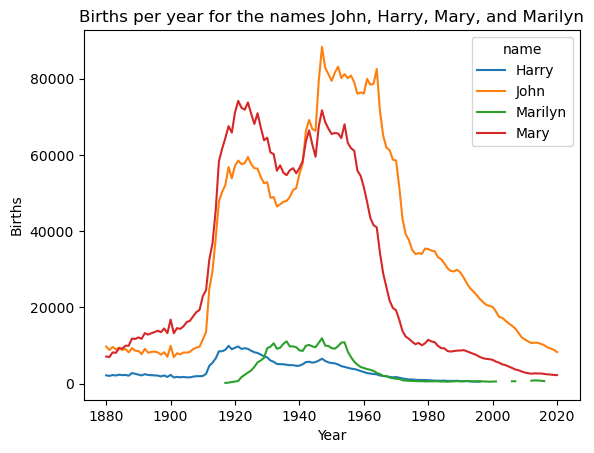

In [9]:
# dataframe with only the names we want to plot
names_to_plot = top1000_names[top1000_names['name'].isin(['John','Harry','Mary','Marilyn'])]

# plot the number of births per year for each name
names_to_plot.groupby(['year','name']).births.sum().unstack(level=1).plot()
plt.title('Births per year for the names John, Harry, Mary, and Marilyn')
plt.ylabel('Births')
plt.xlabel('Year')

Looking at your plots, you might conclude that these names have grown out of favor with the American population. 
But the story is more complicated than that, as you will explore in the next part.

## Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing common names for their children.
One measure of naming diversity is the proportion of births represented by the top 1000 most popular names.

**Part 7**: Plot the proportion of the top 1000 names by year and sex

<AxesSubplot:xlabel='year'>

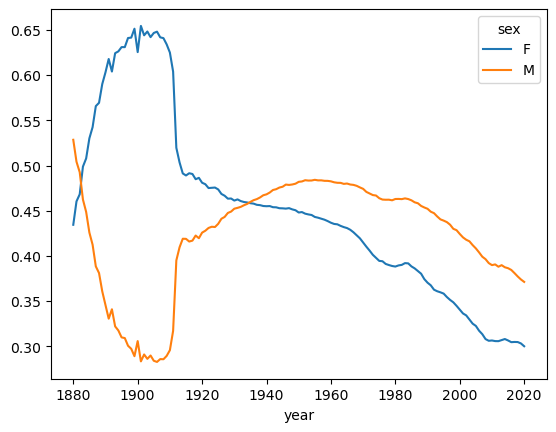

In [10]:
top1000_names.groupby(['sex', 'year'])['prop'].sum().unstack(level=0).plot()

## 10 most popular 2017 names through the ages

**Part 8**: Find the 10 most popular female names in 2017

In [11]:
top10femalenames2017 = list(top1000_names[(top1000_names['year'] == 2017) & (top1000_names['sex'] == 'F')].sort_values(by=['births'], ascending=False).head(10)['name'])

**Part 9**: Plot the proportions of the 10 most popular female names in 2017 by year

<AxesSubplot:xlabel='year'>

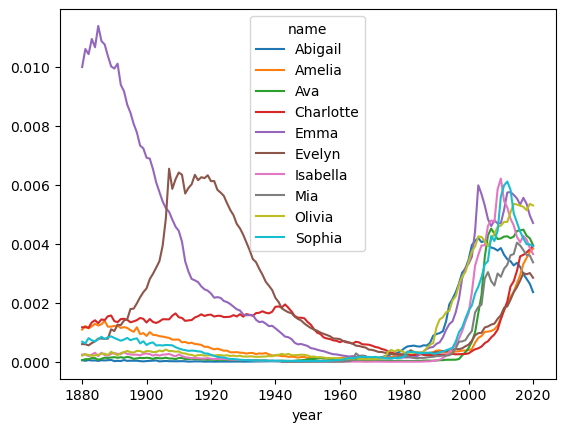

In [12]:
names_to_plot = names[names['name'].isin(top10femalenames2017)]
names_to_plot.groupby(['year','name']).prop.sum().unstack(level=1).plot()

## Similarity between decades

Here, you will explore the similarity between the set of names given in one particular year and the set of names given 10 years previosly.

The **Jaccard similarity** between sets A and B is the number of
elements in both A and B relative to the number of elements in either A or
B. 
If we let |A| denote the number of elements in the set A, then the Jaccard
similarity is

$$
J(A,B)=\frac{|A \cap B|}{|A\cup B|}
$$

**Part 10**: Find the Jaccard similarity between the following two sets

In [13]:
set1 = {'John','Daniel','Drogo'}
set2 = {'Robert', 'John'}

In [14]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection/union

In [15]:
jaccard_similarity(set1, set2)

0.25

**Part 11**: Compute the Jaccard similarity between the set of male names given in 2017 and the set of male names given in 2007

In [16]:
malesnames2017set = set(names[(names.sex == 'M') & (names.year == 2017)].name)
malesnames2007set = set(names[(names.sex == 'M') & (names.year == 2007)].name)

In [17]:
jaccard_similarity(malesnames2017set, malesnames2007set)

0.5367031551835157

**Part 12**: Plot the Jaccard similarity between the set of male names given in one particular year and the set of male names given 10 years previosly by year

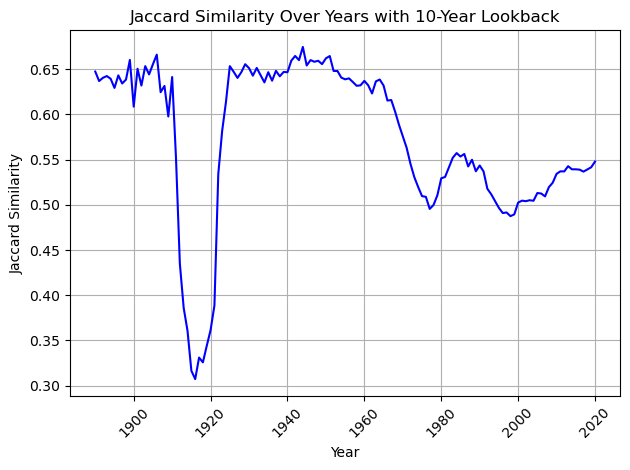

In [46]:
years = sorted(names['year'].unique())
jaccard_similarities = []

for year in years:
    if year - 10 in years:
        set_current_year = set(names[(names['sex'] == 'M') & (names['year'] == year)]['name'])
        set_previous_10year = set(names[(names['sex'] == 'M') & (names['year'] == year - 10)]['name'])
        similarity = jaccard_similarity(set_current_year, set_previous_10year)
        jaccard_similarities.append(similarity)

plt.plot(years[10:], jaccard_similarities, linestyle='-', color='b')
plt.title('Jaccard Similarity Over Years with 10-Year Lookback')
plt.xlabel('Year')
plt.ylabel('Jaccard Similarity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
namesmale1916 = names[(names['year'] == 1916) & (names['sex'] == 'M')]

In [24]:
namesmale1916

,name,sex,births,year,prop,last_letter,prop_last_letter
5161,John,M,50043,1916,0.025870,n,0.165237
5162,William,M,40418,1916,0.020894,m,0.010451
5163,James,M,35568,1916,0.018387,s,0.041101
5164,Robert,M,31741,1916,0.016409,t,0.018163
5165,Joseph,M,23883,1916,0.012346,h,0.040058
...,...,...,...,...,...,...,...
9691,Zelma,M,5,1916,0.000003,a,0.255942
9692,Zera,M,5,1916,0.000003,a,0.255942
9693,Zettie,M,5,1916,0.000003,e,0.177179
9694,Ziba,M,5,1916,0.000003,a,0.255942


##  The last letter revolution

It has been argued (see [here](https://www.babynamewizard.com/archives/2007/7/where-all-boys-end-up-nowadays), for example) that the distribution of boy names by final letter has changed significantly over the last 100 years.

**Part 13:** Extract the last letter from the "name" column

In [19]:
last_letters = names
last_letters['last_letter'] = last_letters['name'].str[-1]
last_letter_counts = last_letters['last_letter'].value_counts(normalize=True)
last_letters['prop_last_letter'] = last_letters['last_letter'].map(last_letter_counts)

In [20]:
last_letters

,name,sex,births,year,prop,last_letter,prop_last_letter
0,Mary,F,7065,1880,0.035065,y,0.067650
1,Anna,F,2604,1880,0.012924,a,0.255942
2,Emma,F,2003,1880,0.009941,a,0.255942
3,Elizabeth,F,1939,1880,0.009624,h,0.040058
4,Minnie,F,1746,1880,0.008666,e,0.177179
...,...,...,...,...,...,...,...
31512,Zykier,M,5,2020,0.000001,r,0.033025
31513,Zylus,M,5,2020,0.000001,s,0.041101
31514,Zymari,M,5,2020,0.000001,i,0.042463
31515,Zyn,M,5,2020,0.000001,n,0.165237


**Part 14**: Plot the proportion of male names by the last letter for the years 1910, 1960, and 2010

<AxesSubplot:xlabel='last_letter'>

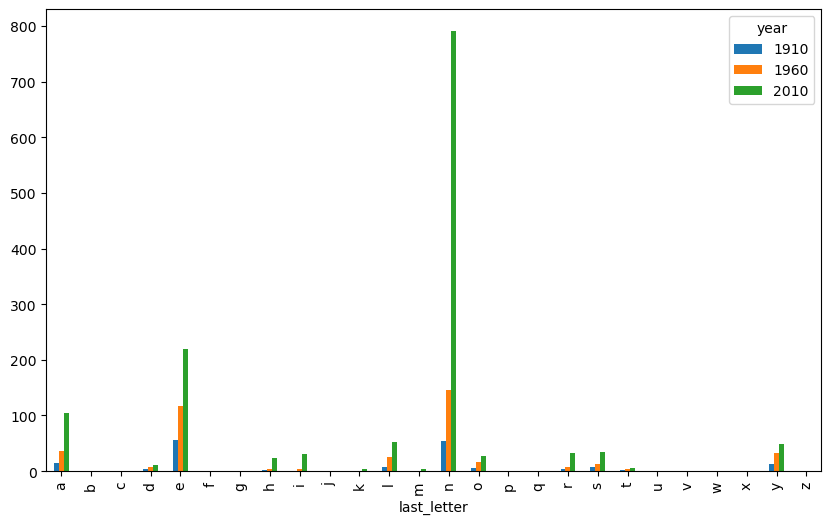

In [21]:
data_to_plot = last_letters[(last_letters.sex == 'M') & (last_letters.year.isin([1910,1960,2010]))].pivot_table(index='last_letter', columns='year', values='prop_last_letter', aggfunc='sum')
# plot
data_to_plot.plot(kind='bar', figsize=(10,6))

**Part 15**: Plot the proportions of male names ending in "e", "n", "d", "s" and "y" by year.

<AxesSubplot:xlabel='year'>

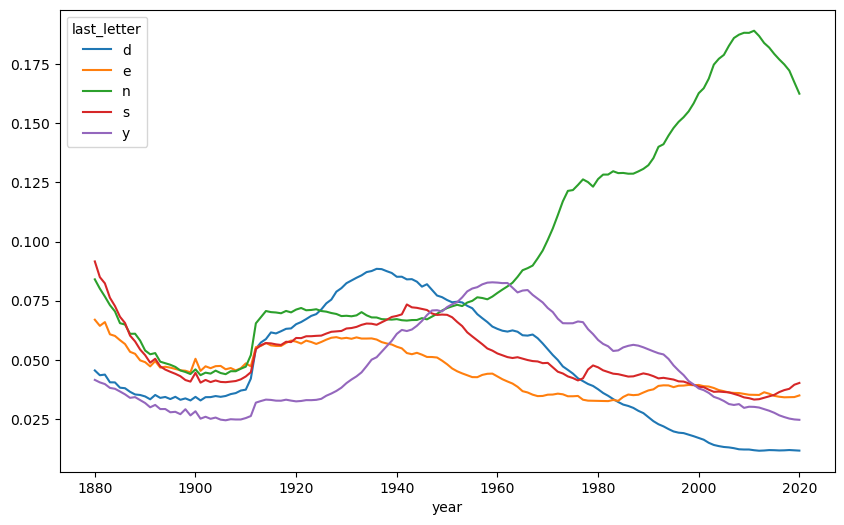

In [41]:
ll_by_year_males = last_letters[(last_letters.sex == 'M') & (last_letters.last_letter.isin(['e', 'n', 'd', 's', 'y']))].groupby(['year', 'last_letter']).prop.sum().unstack(level=1).plot(figsize=(10,6))
ll_by_year_males